<a href="https://colab.research.google.com/github/gaganchapa/Song_popularity_prediction/blob/main/Song_popularity_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Song Poluparity Prediction

## Dataset Pre-Processing and Visualization

In [10]:
#importing the Necessary dependencies 
from sklearn.preprocessing import LabelEncoder
import numpy as np
from sklearn.preprocessing import StandardScaler
import pandas as pd # for reading and printing
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt # for the graph plotting (shows the relationship between the datas)
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split # split the data set in to the train and the test data
import seaborn as sns  #plot the graph of the data set
from sklearn import metrics  # transforming the data in to the metrics

## Importing Dataset

In [11]:
#reaading the CSV file using pandas as pd
song_data = pd.read_csv("top50.csv",encoding = "ISO-8859-1" )
song_data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [12]:
song_data.shape

(50, 14)

In [13]:
song_data.columns

Index(['Unnamed: 0', 'Track.Name', 'Artist.Name', 'Genre', 'Beats.Per.Minute',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.', 'Popularity'],
      dtype='object')

In [14]:
song_data['Genre'].value_counts()

dance pop           8
pop                 7
latin               5
canadian hip hop    3
edm                 3
reggaeton           2
reggaeton flow      2
panamanian pop      2
canadian pop        2
electropop          2
country rap         2
dfw rap             2
brostep             2
trap music          1
escape room         1
pop house           1
australian pop      1
atl hip hop         1
big room            1
boy band            1
r&b en espanol      1
Name: Genre, dtype: int64

In [15]:
#list of all Genere
song_data['Genre'].unique()

array(['canadian pop', 'reggaeton flow', 'dance pop', 'pop', 'dfw rap',
       'trap music', 'country rap', 'electropop', 'reggaeton',
       'panamanian pop', 'canadian hip hop', 'latin', 'escape room',
       'pop house', 'australian pop', 'edm', 'atl hip hop', 'big room',
       'boy band', 'r&b en espanol', 'brostep'], dtype=object)

In [16]:
#checking for the duplicated data 
song_data.duplicated().sum()

0

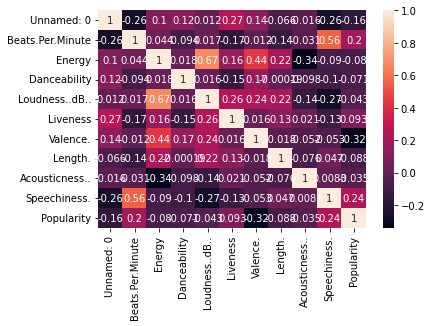

In [17]:
#heatmap is generally used to show the correalation between diffrent attributes of the dataset
 #annot,If True, write the data value in each cell.
 #corr is used to show the corelations between the columns 
sns.heatmap(song_data.corr(),annot=True)

In [18]:
#sns.pairplot(song_data) # plots all the data in the data fied in tha dataset 

**Need to convert the Genre data to the numerical format**

In [19]:
#The Artistname and Genre have the String values so we need to convert them to numerical value 
def encode(data): 
  label_encode = LabelEncoder()
  #label_genre = label_encode.fit_transform()
  label = label_encode.fit_transform(data)
  return label


**Appending the numerical data to the dataset**

In [20]:
song_data["Genre"] = encode(song_data["Genre"])
song_data["Artist.Name"] =encode(song_data["Artist.Name"])
 
# printing Dataframe
song_data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,32,6,117,55,76,-6,8,75,191,4,3,79
1,2,China,1,19,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),2,8,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),9,15,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),28,9,150,65,58,-4,11,18,175,45,7,94


**Selecting Features on Which the Popularity Depends**

In [21]:
selected_features = song_data[['Genre','Beats.Per.Minute','Artist.Name',
       'Energy', 'Danceability', 'Loudness..dB..', 'Liveness', 'Valence.',
       'Length.', 'Acousticness..', 'Speechiness.',]] #feaures on which our reommedtation is dependent
songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset

In [22]:
selected_features.head()

,Genre,Beats.Per.Minute,Artist.Name,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.
0,6,117,32,55,76,-6,8,75,191,4,3
1,19,105,1,81,79,-4,8,61,302,8,9
2,8,190,2,80,40,-4,16,70,186,12,46
3,15,93,9,65,64,-8,8,55,198,12,19
4,9,150,28,65,58,-4,11,18,175,45,7


In [23]:
songs_popularity.head(5)

0    79
1    92
2    85
3    86
4    94
Name: Popularity, dtype: int64

**Fill zeros in to Empty cell**

In [97]:
#replacing the null field with 0
for feature in selected_features:
 song_data[feature] = song_data[feature].fillna(0)

##Spliting data in to Training and Testing

In [25]:
#Splitting into train and test data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(selected_features,songs_popularity,test_size = 1/3)
#x_train get some random data to train the model as per sixe of test_size, greater the test size less will be train data 
#y_train get the same number of crosspondingnoutput values of x_train
print(x_train.shape)
print(y_train.shape)
#X-test-get the test data from the dataset , size of the test data is specified by the programmer  
#y_test get the same number of crosspondingnoutput values of y_test
print(x_test.shape)
print(y_test.shape)
#Random-state specifies the Randomness in the data set and the repetation of the data set for validation

(33, 11)
(33,)
(17, 11)
(17,)


##Random forest Regressor Algorithm

In [26]:
# Initialzing empty lists to append all model's name and corresponding name
data = []  # initialize a array to store the trained data 
Random_Forest = RandomForestRegressor() #creating the instances of RandomForest Regressor
Random_Forest.fit(x_train.values,y_train.values)# it will train the model. Which can be used in predict() with a single arguement

RandomForestRegressor()

In [27]:
y_predict = Random_Forest.predict(x_test.values)
#y_predict = Random_Forest.predict(x_test)

In [28]:
y_predict

array([87.52, 87.84, 88.7 , 87.85, 88.06, 86.54, 87.7 , 88.15, 88.13,
       85.25, 88.53, 87.56, 88.25, 87.11, 87.96, 87.58, 86.4 ])

**Checking Mean Squared Error for Random Forest Regressor**

In [29]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, y_predict)

17.606041176470583

In [30]:
np.sqrt(mean_squared_error(y_test, y_predict))

4.1959553353760315

##Linear Regression Algorithm

In [31]:
import numpy as np
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(x_train, y_train)
reg.score(x_train, y_train)


0.29260241088922856

In [32]:
Reg_predict =reg.predict(x_test)
Reg_predict

array([85.02794624, 88.9025519 , 86.99439276, 84.70755607, 85.80693928,
       80.24015944, 92.57772339, 81.31065987, 86.85865188, 87.04988626,
       85.73949737, 88.32182142, 86.80714503, 87.17079074, 85.7393839 ,
       87.73944209, 82.72177931])

**Checking Mean Squared Error for Linear Regression**

In [33]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, Reg_predict)

23.336053478675616

In [34]:
np.sqrt(mean_squared_error(y_test, Reg_predict))

4.830740468983572

In [35]:
#The Artistname and Genre have the String values so we need to convert them to numerical value 
def encode(data): 
  label_encode = LabelEncoder()
  #label_genre = label_encode.fit_transform()
  label = label_encode.fit_transform(data)
  return label

In [36]:
#song_data.drop("Genre", axis=1, inplace=True) song_data['Genre'] 'Artist.Name']
 
# Appending the array to our dataFrame
# with column name 'Purchased'
song_data["Genre"] = encode(song_data["Genre"])
song_data["Artist.Name"] =encode(song_data["Artist.Name"])
song_data["Track.Name"] =encode(song_data["Track.Name"])
# printing Dataframe
song_data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,33,32,6,117,55,76,-6,8,75,191,4,3,79
1,2,6,1,19,105,81,79,-4,8,61,302,8,9,92
2,3,48,2,8,190,80,40,-4,16,70,186,12,46,85
3,4,3,9,15,93,65,64,-8,8,55,198,12,19,86
4,5,11,28,9,150,65,58,-4,11,18,175,45,7,94


In [138]:
song_data.drop(['Unnamed: 0'], axis=1)
song_data.head(5)

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,33,32,6,117,55,76,-6,8,75,191,4,3,79
1,2,6,1,19,105,81,79,-4,8,61,302,8,9,92
2,3,48,2,8,190,80,40,-4,16,70,186,12,46,85
3,4,3,9,15,93,65,64,-8,8,55,198,12,19,86
4,5,11,28,9,150,65,58,-4,11,18,175,45,7,94


In [157]:
from sklearn.metrics  import  mean_squared_error
N = 13;
n = 1;
 
def fun1():
    global N, n;
    if (n <= N):
      sc = song_data.iloc[:,n]
      songs_popularity = song_data['Popularity']
       #The output that the user get input from our dataset
      x_train,x_test,y_train,y_test = train_test_split(sc,songs_popularity,test_size = 1/3)
      x_train2 = x_train.values.reshape(-1, 1)
      x_test2 = x_test.values.reshape(-1, 1)
      y_train2 = y_train.values.reshape(-1, 1)
      y_test2 = y_test.values.reshape(-1, 1)
      reg = LinearRegression().fit(x_train2, y_train2)
      reg_score = reg.score(x_train2, y_train2)
      print("score ==> ",reg_score,",index ==>",n)
      Reg_predict =reg.predict(x_test2)
      mean = mean_squared_error(y_test2, Reg_predict)
      print("mean square error ==> ",mean, ",index ==> ",n)
      n += 1;
      fun2();
    else:
        return;
def fun2():
    global N, n;
    if (n <= N):
        sc = song_data.iloc[:,n]
        songs_popularity = song_data['Popularity'] #The output that the user get input from our dataset
        x_train,x_test,y_train,y_test = train_test_split(sc,songs_popularity,test_size = 1/3)
        x_train2 = x_train.values.reshape(-1, 1)
        x_test2 = x_test.values.reshape(-1, 1)
        y_train2 = y_train.values.reshape(-1, 1)
        y_test2 = y_test.values.reshape(-1, 1)
        reg = LinearRegression().fit(x_train2, y_train2)
        reg_score = reg.score(x_train2, y_train2)
        print("score ==> ",reg_score,",index ==>",n)
        Reg_predict =reg.predict(x_test2)
        mean = mean_squared_error(y_test2, Reg_predict)
        print("mean square error ==> ",mean, ",index ==> ",n)
        n += 1;
        fun1();
    else:
        return;       

In [158]:
fun1()

score ==>  0.00822808008015774 ,index ==> 1
mean square error ==>  26.943609703862364 ,index ==>  1
score ==>  0.002210424326498761 ,index ==> 2
mean square error ==>  37.467502828697214 ,index ==>  2
score ==>  0.07911680983449598 ,index ==> 3
mean square error ==>  13.110714275030048 ,index ==>  3
score ==>  0.00031019826665001915 ,index ==> 4
mean square error ==>  16.229668994689433 ,index ==>  4
score ==>  0.002163005648236793 ,index ==> 5
mean square error ==>  35.92750869173162 ,index ==>  5
score ==>  0.0029761967549274404 ,index ==> 6
mean square error ==>  7.4672461164272566 ,index ==>  6
score ==>  0.032200889680497724 ,index ==> 7
mean square error ==>  18.884113431829576 ,index ==>  7
score ==>  0.0007254281227633275 ,index ==> 8
mean square error ==>  18.633649188270436 ,index ==>  8
score ==>  0.15611397743797029 ,index ==> 9
mean square error ==>  19.64879478009058 ,index ==>  9
score ==>  0.0040196962600219655 ,index ==> 10
mean square error ==>  31.968554348663165 ,in

##Decision Tree Algorithm

In [40]:
from sklearn.tree import DecisionTreeRegressor 
Decision_tree = DecisionTreeRegressor(random_state = 0)
Decision_tree.fit(x_train.values,y_train.values)

DecisionTreeRegressor(random_state=0)

In [41]:
dec_predict =Decision_tree.predict(x_test.values)
dec_predict

array([89., 89., 91., 91., 89., 82., 89., 90., 91., 89., 86., 91., 84.,
       88., 90., 89., 70.])

**Checking Mean Squared Error for Decision tree**

In [42]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, dec_predict)

39.470588235294116

In [43]:
np.sqrt(mean_squared_error(y_test, dec_predict))

6.282562234892235

## SVM Algorithm

In [44]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler
svm = make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.2))
svm.fit(x_train.values,y_train.values)
svm_predict=svm.predict(x_test.values)
svm_predict


array([88.71526109, 88.77451086, 88.5205538 , 88.15033354, 88.29279472,
       88.68055396, 88.57694671, 87.88326039, 88.70714171, 88.33896802,
       88.26242718, 88.5584776 , 89.21472972, 88.73932944, 88.69479835,
       88.48574119, 88.23771507])

**Checking Mean Squared Error for SVM Model**

In [45]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, svm_predict)

15.726565333846262

In [46]:
np.sqrt(mean_squared_error(y_test, svm_predict))

3.965673377100825

##**K-Nearest Neighbor(KNN) Algorithm**

In [47]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(x_train, y_train)

KNeighborsRegressor()

In [48]:
knn.score(x_test, y_test)

0.09268054940186088

In [49]:
knn_predict =knn.predict(x_test.values)
knn_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([90.2, 89.4, 88.2, 85.8, 88.4, 89. , 87.8, 82.2, 89.4, 88. , 87.8,
       86.2, 88.4, 88.2, 88.6, 87.4, 86.2])

**Checking Mean Squared Error for KNN Model**

In [50]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, knn_predict)

14.171764705882353

In [51]:
np.sqrt(mean_squared_error(y_test, knn_predict))

3.764540437541129

##Gaussian Regression

In [52]:
from sklearn.datasets import make_friedman2
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
kernel = DotProduct() + WhiteKernel()
gau = GaussianProcessRegressor(kernel=kernel,random_state=0).fit(x_train, y_train)

In [53]:
#gpr.score(x_test,y_test)
gaussian_predict= gau.predict(x_test)
gaussian_predict

array([85.21207938, 89.20485502, 86.89709491, 84.80037983, 85.81125681,
       80.93275485, 92.68512678, 81.59126083, 86.70849321, 87.32616184,
       86.07430491, 88.50348145, 87.04790812, 86.63279609, 86.15912045,
       87.87819637, 82.91685691])

In [54]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, gaussian_predict)

21.60636821071927

In [55]:
np.sqrt(mean_squared_error(y_test, gaussian_predict))

4.6482650753500785

##**Lasso Regression**

In [56]:
from sklearn import linear_model
lasso_reg = linear_model.Lasso(alpha=50,max_iter=100,tol=0.1) #max_iter --> The maximum number of iterations, alphafloat:->default=1.0
#Constant that multiplies the L1 term, controlling regularization strength. alpha must be a non-negative float, tol:--> The tolerance for the optimization
lasso_reg.fit(x_train,y_train)

Lasso(alpha=50, max_iter=100, tol=0.1)

In [57]:
lasso_reg.score(x_test,y_test)

-0.09268684753036438

In [58]:
lasso_reg.score(x_train,y_train)

0.0

In [59]:
lasso_predict= lasso_reg.predict(x_test)
lasso_predict

array([87.09090909, 87.09090909, 87.09090909, 87.09090909, 87.09090909,
       87.09090909, 87.09090909, 87.09090909, 87.09090909, 87.09090909,
       87.09090909, 87.09090909, 87.09090909, 87.09090909, 87.09090909,
       87.09090909, 87.09090909])

In [60]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, lasso_predict)

17.067087992221676

In [61]:
np.sqrt(mean_squared_error(y_test, lasso_predict))

4.1312332289791724

##Ridge Regression


In [62]:
from sklearn.linear_model import Ridge
ridge= Ridge(alpha=1.0)
ridge.fit(x_train, y_train)


Ridge()

In [63]:
ridge_predict=ridge.predict(x_test)

In [64]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, ridge_predict)

23.225305476940378

In [65]:
np.sqrt(mean_squared_error(y_test, ridge_predict))

4.819263997431597

## Bayesian Ridge Regression

In [66]:
from sklearn import linear_model
BayReg = linear_model.BayesianRidge()
BayReg.fit(x_train, y_train)
bayesian_predict= BayReg.predict(x_test)

Checking Mean Squared Error

In [67]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, bayesian_predict)

17.104013810936628

In [68]:
np.sqrt(mean_squared_error(y_test, bayesian_predict))

4.135699917902244

## Kernel Ridge Regression 

In [69]:
import sklearn
from sklearn.kernel_ridge import KernelRidge
kerReg = sklearn.kernel_ridge.KernelRidge(alpha=1,kernel='linear', gamma=None, degree=3, coef0=1, kernel_params=None)
kerReg.fit(x_train,y_train)
ker_predict = reg.predict(x_test)

In [70]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, ker_predict)

23.336053478675616

In [71]:
np.sqrt(mean_squared_error(y_test, ker_predict))

4.830740468983572

## Polynomial Regression

In [72]:
print("Enter the degree")
deg = int(input())
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly = PolynomialFeatures(degree= deg, include_bias=False)
poly_features = poly.fit_transform(x_train)
poly_reg_model = LinearRegression()
poly_fit = poly_reg_model.fit(poly_features, y_train)

Enter the degree
5


In [73]:
poly_predict= poly_reg_model.predict(poly_features)
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_train, poly_predict)

2.2459109020401364e-27

## Neural Network Regression

In [74]:
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

In [75]:
sc_X = StandardScaler()
X_trainscaled=sc_X.fit_transform(x_train)
X_testscaled=sc_X.transform(x_test)

In [76]:
CNNReg = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_trainscaled, y_train)

In [77]:
y_pred=CNNReg.predict(X_testscaled)
y_pred

array([ 63.86000708,  83.39425751,  81.08520107,  68.44809578,
        73.87548422,  90.42234158, 118.9289503 ,  60.08452916,
        86.49212319,  77.48381709,  59.12793423,  93.35425172,
        93.95636738, 135.24477545,  90.38136528,  65.02495017,
        74.07515616])

In [78]:
from sklearn.metrics  import  mean_squared_error
mean_squared_error(y_test, y_pred)

445.5360038919879

In [79]:
np.sqrt(mean_squared_error(y_test, y_pred))

21.107723797036662

##User Input


In [164]:
Artist = str(input("Enter the Artist.Name: "))
genre = str(input("Enter the Genre: "))
arr=[Artist,genre] #need to convert strings to numerical value 
A = encode(arr)
Beats = int(input("Enter the Beats.Per.Minute: "))
Energy = int(input("Enter the Energy: "))
Danceability = int(input("Enter the Danceability: "))
Loudness = int(input("Enter the Loudness; "))
Liveness = int(input("Enter the Liveness: "))
Valence = int(input("Enter the Valence: "))
Length = int(input("Enter the Length: "))
Acousticness = int(input("Enter the Acousticness: "))
Speechiness = int(input("Enter the Speechiness: "))
data = np.array([[A[0],A[1],Beats,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness]])
#Ed Sheeran	pop	102	68	80	-5	9	84	220	9	4	
#Prediction:- 84 

Enter the Artist.Name: Ed Sheeran
Enter the Genre: pop
Enter the Beats.Per.Minute: 102
Enter the Energy: 68
Enter the Danceability: 80
Enter the Loudness; -5
Enter the Liveness: 9
Enter the Valence: 84
Enter the Length: 220
Enter the Acousticness: 9
Enter the Speechiness: 4


**Input from the user to predict Popularity**

In [165]:
print("1. Linear Regression")
print("2. Random Forest Regressor")
print("3. Lasso Regression")
print("4. Ridge Regression")
print("5. Decision Tree Algorithm")
print("6. SVM Regressor")
print("7. Polynomial Regression")
print("8. CNN Regression")
print("9. Bayesian Ridge Regression")
print("10. Kernel Ridge Regression")
print("11. KNN Regression")
print("Regression Type: ")
user_in = int(input())
if(user_in == 2):
  rand = Random_Forest.predict(data)
  print(rand)
elif(user_in == 6):
  rand = svm_predict.predict(data)
  print(rand)
elif(user_in == 1):
  rand = reg.predict(data)
  print(rand)
elif(user_in == 4):
  rand = ridge.predict(data)
  print(rand)
elif(user_in == 5):
  rand = Decision_tree.predict(data)
  print(rand)
elif(user_in == 9):
  rand = BayReg.predict(data)
  print(rand)
elif(user_in == 3):
  rand = lasso_reg.predict(data)
  print(rand)
elif(user_in == 7):
  rand = poly_reg_model.predict(data)
  print(rand) 
elif(user_in == 8):
  rand_2 = CNNReg.predict(data)
  print(rand_2)
elif(user_in == 10):
  rand_2 = kerReg.predict(data)
  print(rand_2)  
elif(user_in == 11):
  rand_2 = knn.predict(data)
  print(rand_2)
#Ed Sheeran	pop	102	68	80	-5	9	84	220	9	4	
#Prediction:- 84 


1. Linear Regression
2. Random Forest Regressor
3. Lasso Regression
4. Ridge Regression
5. Decision Tree Algorithm
6. SVM Regressor
7. Polynomial Regression
8. CNN Regression
9. Bayesian Ridge Regression
10. Kernel Ridge Regression
11. KNN Regression
Regression Type: 
2
[83.86]
